1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd

Text(0, 0.5, 'N')

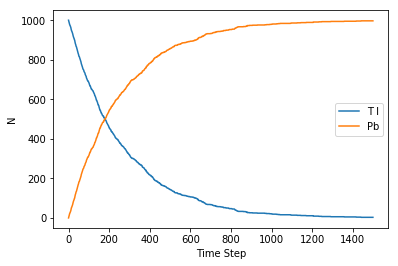

In [3]:
time = 1500
Tln = 1000
Pbn = 0
t = 1
tau = 3.052*60 
prob = 1 - 2**(-t/tau)



Tl_ev = []
Pb_ev = []
times=[]
for i in range(time):
    Tl_ev.append(Tln)
    Pb_ev.append(Pbn)
    times.append(i)
    Tl = np.random.uniform(0,1,size=Tln)
    Tln = len( Tl[prob-Tl <= 0] )
    Pbn= Pbn + len( Tl[prob -Tl> 0] )

        
labels = ['T l','Pb']
plt.plot( times, Tl_ev )
plt.plot( times, Pb_ev )
plt.legend(labels)
plt.xlabel('Time Step')
plt.ylabel('N')


Text(0.5, 0, 'time step')

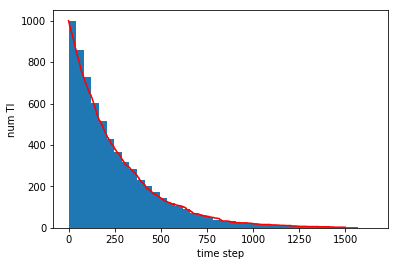

In [88]:
def rev(p, mu=np.log(2)/tau):
    return -np.log(1-p)/mu

x = np.random.uniform(0, 1,1000)
t=rev(x)
plt.hist(t,bins=40,cumulative=-1)[2]
plt.plot(times,Tl_ev,c="r",label="First Method")
plt.ylabel('num Tl')
plt.xlabel('time step')


2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [30]:
alpha=10**6
Z=79
e=1.60217*(10**-19)
E=7.7*(10**6)*e
epsilon_0=8.85419*(10**-12)
a0=5.29177*(10**-11)
n=np.random.rand(alpha)
b=np.sqrt( (-2)*( a0/100 )**(2) * np.log( 1-n ) )
angle=2*np.arctan( Z*e**2 / (2*np.pi*epsilon_0*E*b ) )
f=sum(1 if a > np.pi/2 else 0 for a in angle)/alpha
print('Fraction greater than  𝜋/2: ', f)

Fraction greater than  𝜋/2:  0.001531


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

/Users/roshana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/roshana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sin
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/roshana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  


True value with scipy= 1.4514015822549398
Value Monte Carlo integration= 1.451192
Error Monte Carlo integration= 0.00020958225493972193
Value mean value method= 1.4517163155584074
Error mean value method= 0.0003147333034676514


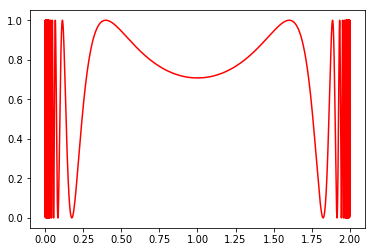

In [55]:
from scipy import integrate
def f(x):
    return (np.sin(1/(x*(2-x))))**2


dx = np.linspace(0,2,100000) # dx=2/100000
plt.plot(dx,f(dx),'r-')
integral_real = integrate.quad( f, 0, 2, limit=100000 )[0]
print("True value with scipy=", integral_real )

# Monte Carlo integration hit and miss

N = 1000000
c = 0
for i in range(N):
    x = 2*np.random.random()
    if np.random.random() < f(x): c += 1
value = 2*c/N
print('Value Monte Carlo integration=', value )
print('Error Monte Carlo integration=', abs(integral_real-value) )

mean = 2 * f( 2*np.random.random(N) ).sum() / N
print('Value mean value method=',mean)
print('Error mean value method=',abs(integral_real-mean))

4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [108]:
def DD(p):
    x,y = p
    if x**2+y**2<1:
        return 1
    else:
        return 0
    
N = 100000
points = 2*np.random.random(size=(N, 2))-1
c = 0
for i in points:
    c+=area(i)
print("2D =",(4*c/N))

def D_10(p):
    to_sum = p**2
    if to_sum.sum()<1:
        return 1
    else:
        return 0

points = 2*np.random.random(size=(N, 10))-1
c = 0
for p in points:
    c+=D_10(p)
print("10D = ",(2**10*c/N))

2D = 3.13912
10D =  2.44736


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [114]:
def w(x):
    return 1/np.sqrt(x)
def f(x):
    return 1/(np.sqrt(x)*(np.exp(x)+1))
def integral(N, x1, x2):
    sampling = integrate.quad(w,x1,x2)[0]
    x = np.random.rand(N)
    res = f(x)/w(x)
    return res.sum()*sampling/N

N = int(10**5)

print("Result: ",integral(N,0,1))

Result:  0.7591288849725943
